This notebook creates a Support Vector Machine (SVM) estimator to solve PIMA classification problem

## Import statements

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
# Read the dataset
data = load_dataset()

# Preprocess the dataset
preprocess(data)

# Split dataset in two arrays: X for features and y for labels
X = get_features(data)
y = get_outcome(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

## Build SVM model

In [3]:
model = SVC()

## Cross-validate the model

In [4]:
cv = RepeatedStratifiedKFold(4, 3, random_state=13)
cv_results = cross_validate(model, X_train, y_train, scoring=['precision', 'recall', 'accuracy'], cv=cv, return_train_score=True)
cv_metrics = pd.DataFrame(data=cv_results).drop(columns=['score_time', 'fit_time'])

### Show the results

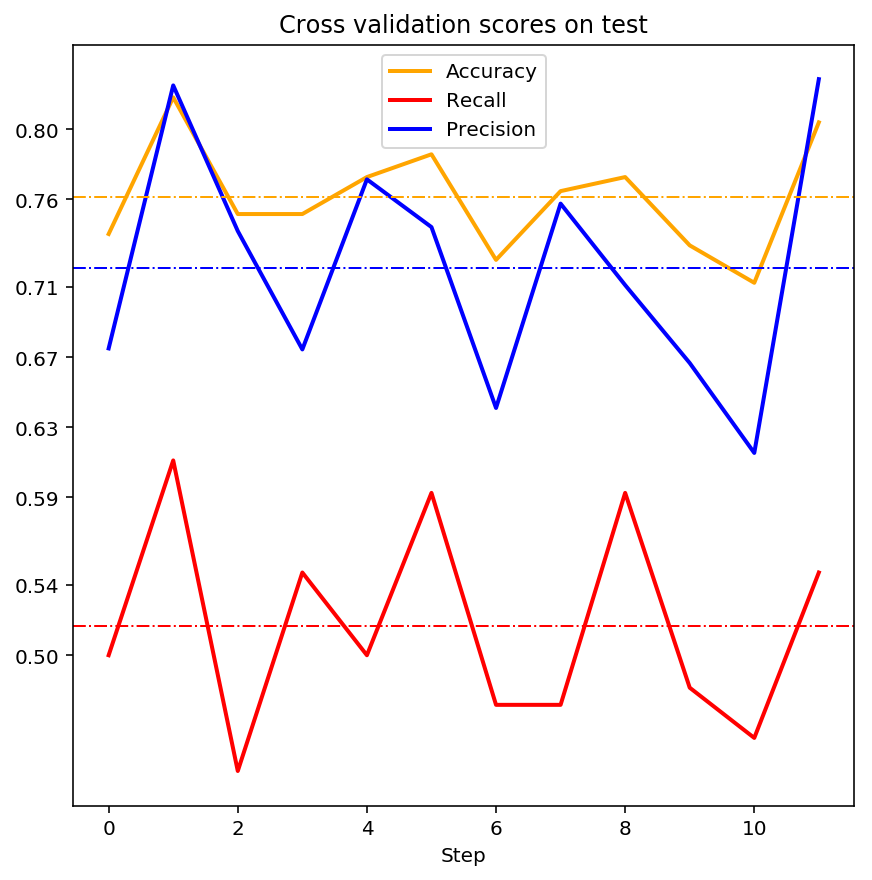

In [5]:
plt.figure(figsize=(7,7))

plt.plot(cv_metrics['test_accuracy'], color='Orange', linewidth=2)

plt.plot(cv_metrics['test_recall'], color='Red', linewidth=2)
plt.plot(cv_metrics['test_precision'], color='Blue', linewidth=2)

plt.axhline(cv_metrics['test_accuracy'].mean(), color='Orange', linewidth=1, linestyle='-.')
plt.axhline(cv_metrics['test_recall'].mean(), color='Red', linewidth=1, linestyle='-.')
plt.axhline(cv_metrics['test_precision'].mean(), color='Blue', linewidth=1, linestyle='-.')

plt.yticks(np.round(np.linspace(0.5, 0.8, 8), 2))
plt.title('Cross validation scores on test')
plt.xlabel('Step')
plt.legend(['Accuracy', 'Recall', 'Precision']);

In [6]:
pd.DataFrame({
    'Mean':cv_metrics.mean(),
    'Standard Deviation':cv_metrics.std()
})


,Mean,Standard Deviation
test_precision,0.721025,0.068841
train_precision,0.810323,0.019403
test_recall,0.516859,0.059592
train_recall,0.580503,0.030736
test_accuracy,0.761098,0.031594
train_accuracy,0.806372,0.011483


## Final prediction using Test set

In [7]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
print("Accuracy on train set: {}".format(accuracy_score(y_train, y_train_pred).round(3)))
print("Classification report on train set: ")
print(classification_report(y_train, y_train_pred))

Accuracy on train set: 0.8
Classification report on train set: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       400
           1       0.80      0.57      0.66       214

   micro avg       0.80      0.80      0.80       614
   macro avg       0.80      0.75      0.76       614
weighted avg       0.80      0.80      0.79       614



In [10]:
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_test_pred).round(3)))
print("Classification report on test set: ")
print(classification_report(y_test, y_test_pred))

Accuracy on test set: 0.753
Classification report on test set: 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



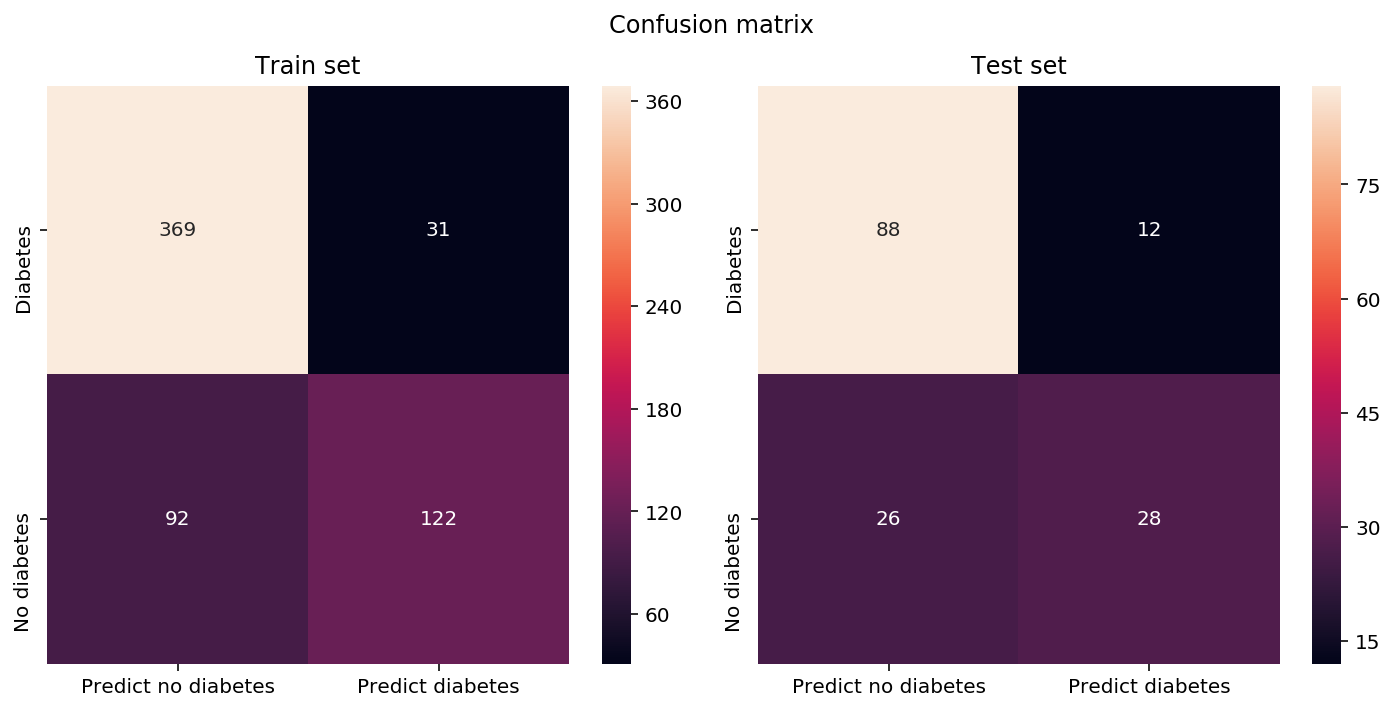

In [41]:

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_pred), columns=['Predict no diabetes', 'Predict diabetes'],
                 index=['Diabetes', 'No diabetes'])

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_pred), columns=['Predict no diabetes', 'Predict diabetes'],
                 index=['Diabetes', 'No diabetes'])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(ax[0])
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title('Train set')
plt.sca(ax[1])
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Test set')

plt.suptitle('Confusion matrix')
plt.tight_layout()
plt.subplots_adjust(top=0.88)